# Netlist driven flow (circuits)

You have two options for working with gdsfactory:

1. **layout driven flow**: you code your layout using python functions, and then extract the YAML netlist to simulate the circuit. This is the flow that you have been doing so far.
2. **netlist driven flow**: you define your circuit (instances, placements and routes) in YAML. From the netlist you can simulate the circuit or generate the layout.

Using the netlist driven flow you can define components, circuits and masks.

YAML is a more human readable version of JSON

to define a Component from YAML you need to define:

- instances: with each instance setting
- placements: with X and Y

And optional:

- routes: between instances
- connections: to connect components ports
- ports: define input and output circuit ports


When running this tutorial make sure you UNCOMMENT this line `%matplotlib widget` so you can live update your changes in the YAML file

`# %matplotlib widget`  -> `%matplotlib widget`

In [1]:
# %matplotlib widget

2022-05-31 23:07:05.400 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.8.3


Textarea(value='\nname: sample_different_factory\n\ninstances:\n    bl:\n      component: pad\n    tl:\n      …

Output()

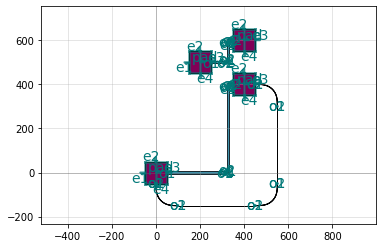

In [2]:
import ipywidgets
from IPython.display import clear_output
import matplotlib.pyplot as plt
import gdsfactory as gf

x = ipywidgets.Textarea(rows=20, columns=480)

x.value = """
name: sample_different_factory

instances:
    bl:
      component: pad
    tl:
      component: pad
    br:
      component: pad
    tr:
      component: pad

placements:
    tl:
        x: 200
        y: 500

    br:
        x: 400
        y: 400

    tr:
        x: 400
        y: 600


routes:
    electrical:
        settings:
            separation: 20
            layer: [31, 0]
            width: 10
        links:
            tl,e3: tr,e1
            bl,e3: br,e1
    optical:
        settings:
            radius: 100
        links:
            bl,e4: br,e3
"""

out = ipywidgets.Output()
display(x, out)


def f(change, out=out):
    try:
        c = gf.read.from_yaml(change["new"])
        # clear_output()
        fig = c.plot()
        c.show()
        out.clear_output()
    except Exception as e:
        out.clear_output()
        with out:
            display(e)


x.observe(f, "value")
f({"new": x.value})

Lets start by defining the `instances` and `placements` section in YAML

Lets place an `mmi_long` where you can place the `W0` port at `x=20, y=10`

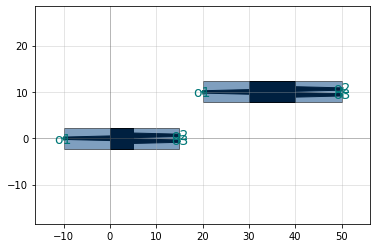

Textarea(value='\nname: mmis\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n        wid…

Output()

In [3]:
x.value = """
name: mmis
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: False
"""
display(x, out)

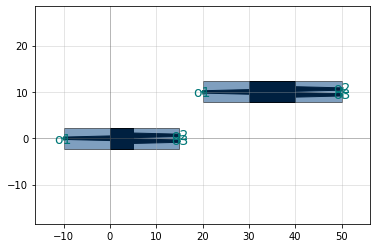

Textarea(value='\nname: mmi_mirror\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n     …

Output()

In [4]:
x.value = """
name: mmi_mirror
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: False
"""
display(x, out)

## ports

You can expose any ports of any instance to the new Component with a `ports` section in YAML

Lets expose all the ports from `mmi_long` into the new component.

Ports are exposed as `new_port_name: instance_name, port_name`

you can see the ports in `red` and subports in `blue`

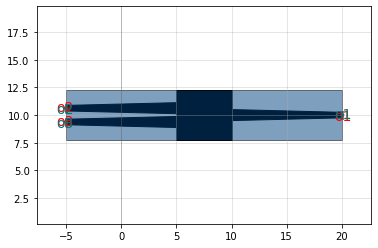

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_ff80cc58' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n        width_mmi: 4.5\…

Output()

In [5]:
x.value = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: True
        
ports:
    o3: mmi_long,o3
    o2: mmi_long,o2
    o1: mmi_long,o1
"""

display(x, out)

You can also define a mirror placement using a port

Try mirroring with other ports `o2`, `o3` or with a number as well as with a rotation `90`, `180`, `270`

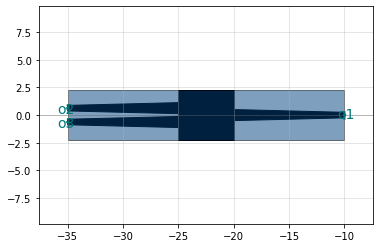

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_49396694' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n        width_mmi: 4.5\…

Output()

In [6]:
x.value = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        x: 0
        y: 0
        mirror: o1
        rotation: 0
"""

display(x, out)

## connections

You can connect any two instances by defining a `connections` section in the YAML file.

it follows the syntax.

`instance_source,port : instance_destination,port`

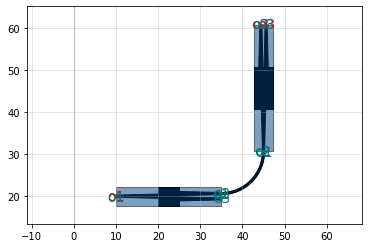

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_044ca791' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    b:\n      component: bend_circular\n    mmi_long:\n      component: mmi1x2\n…

Output()

In [7]:
x.value = """
instances:
    b:
      component: bend_circular
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_short:
        port: o1
        x: 10
        y: 20
connections:
    b,o1 : mmi_short,o2
    mmi_long,o1: b, o2

ports:
    o1: mmi_short,o1
    o2: mmi_long,o2
    o3: mmi_long,o3
"""

display(x, out)

**Relative port placing**

You can also place a component with respect to another instance port

You can also define an x and y offset with `dx` and `dy`

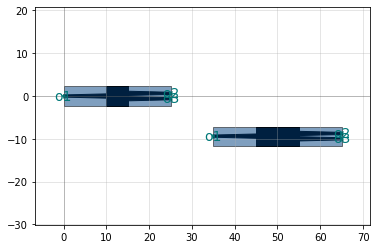

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_2c2e495d' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n        width_mmi: 4.5\…

Output()

In [8]:
x.value = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:
    mmi_short:
        port: o1
        x: 0
        y: 0
    mmi_long:
        port: o1
        x: mmi_short,o2
        y: mmi_short,o2
        dx : 10
        dy: -10
"""


display(x, out)

## routes

You can define routes between two instanes by defining a `routes` section in YAML

it follows the syntax

```YAML

routes:
    route_name:
        links:
            instance_source,port: instance_destination,port
        settings:  # for the route (optional)
            waveguide: strip
            width: 1.2

```

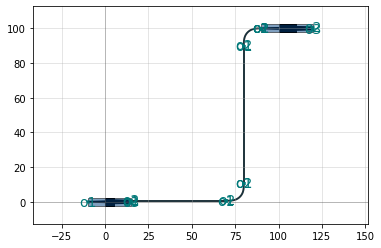

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_728519ea' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n        width_mmi: 4.5\…

Output()

In [9]:
x.value = """
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_long:
        x: 100
        y: 100
routes:
    optical:
        links:
            mmi_short,o2: mmi_long,o1
        settings:
            cross_section:
                cross_section: strip
                settings:
                    layer: [2, 0]
"""

display(x, out)

You can **rotate** and instance specifying the angle in degrees

You can also access the routes in the newly created component

## instances, placements, connections, ports, routes

Lets combine all you learned so far.

You can define the netlist connections of a component by a netlist in YAML format

Note that you define the connections as `instance_source.port ->
instance_destination.port` so the order is important and therefore you can only
change the position of the `instance_destination`


You can define several routes that will be connected using `gf.routing.get_bundle`

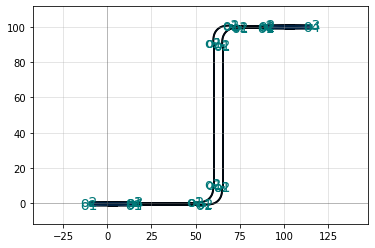

Textarea(value='\nname:\n    connections_2x2_problem\n\ninstances:\n    mmi_bottom:\n      component: mmi2x2\n…

Output()

In [10]:
x.value = """
name:
    connections_2x2_problem

instances:
    mmi_bottom:
      component: mmi2x2
    mmi_top:
      component: mmi2x2

placements:
    mmi_top:
        x: 100
        y: 100

routes:
    optical:
        links:
            mmi_bottom,o4: mmi_top,o1
            mmi_bottom,o3: mmi_top,o2

"""

display(x, out)

You can also add custom component_factories to `gf.read.from_yaml`

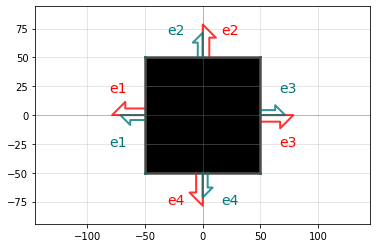

In [11]:
@gf.cell
def pad_new(size=(100, 100), layer=gf.LAYER.WG):
    c = gf.Component()
    compass = c << gf.components.compass(size=size, layer=layer)
    c.ports = compass.ports
    return c


gf.get_active_pdk().register_cells(pad_new=pad_new)
c = pad_new(cache=False)
f = c.plot()

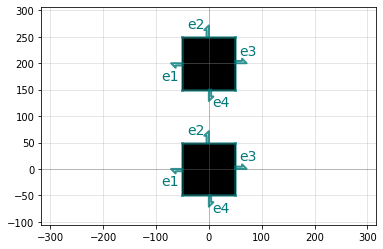

Textarea(value='\nname:\n    connections_2x2_problem\n\ninstances:\n    bot:\n      component: pad_new\n    to…

Output()

In [12]:
x.value = """
name:
    connections_2x2_problem

instances:
    bot:
      component: pad_new
    top:
      component: pad_new

placements:
    top:
        x: 0
        y: 200
"""

display(x, out)

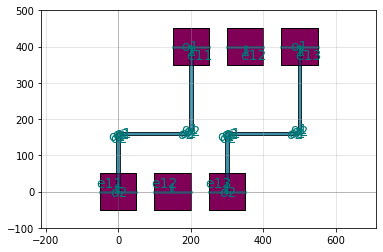

Textarea(value='\nname: custom_routes\n\ninstances:\n    t:\n      component: pad_array\n      settings:\n    …

Output()

In [13]:
x.value = """
name: custom_routes

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 200
        y: 400
routes:
    electrical:
        settings:
            layer: [31, 0]
            width: 10.
            end_straight_length: 150
        links:
            t,e11: b,e11
            t,e13: b,e13
"""

display(x, out)

Also, you can define route aliases, that have different settings and specify the route `factory` as a parameter as well as the `settings` for that particular route alias.

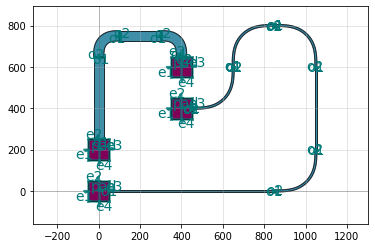

Textarea(value='\nname: sample_settings\n\ninstances:\n    bl:\n      component: pad\n    tl:\n      component…

Output()

In [14]:
x.value = """
name: sample_settings

instances:
    bl:
      component: pad
    tl:
      component: pad
    br:
      component: pad
    tr:
      component: pad

placements:
    tl:
        x: 0
        y: 200

    br:
        x: 400
        y: 400

    tr:
        x: 400
        y: 600

routes:
    optical_r100:
        settings:
            radius: 100
            layer: [31, 0]
            width: 50
        links:
            tl,e2: tr,e2
    optical_r200:
        settings:
            radius: 200
            width: 10
            layer: [31, 0]
        links:
            bl,e3: br,e3
"""

display(x, out)

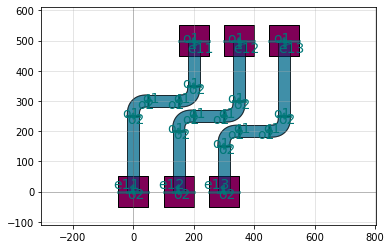

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_b65bdc03' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    t:\n      component: pad_array\n      settings:\n          orientation: 270\…

Output()

In [15]:
x.value = """
instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 200
        y: 500
routes:
    optical:
        settings: 
            radius: 50
            width: 40
            layer: [31,0]
            end_straight_length: 150
            separation: 50
        links:
            t,e11: b,e11
            t,e12: b,e12
            t,e13: b,e13
"""

display(x, out)

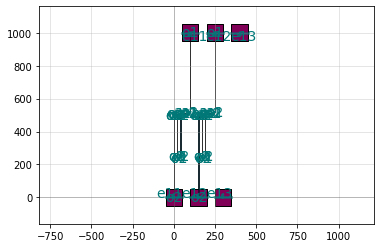

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_e5a6bfdc' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\n\ninstances:\n    t:\n      component: pad_array\n      settings:\n          orientation: 27…

Output()

In [16]:
x.value = """

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 100
        y: 1000
routes:
    route1:
        routing_strategy: get_bundle_path_length_match
        settings: 
            extra_length: 500
            width: 2
            layer: [31,0]
            end_straight_length: 500
        links:
            t,e11: b,e11
            t,e12: b,e12
"""

display(x, out)

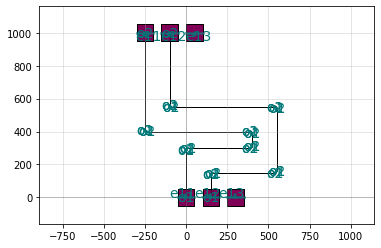

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_75b44ce9' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    t:\n      component: pad_array\n      settings:\n          orientation: 270\…

Output()

In [17]:
x.value = """
instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: -250
        y: 1000
routes:
    route1:
        routing_strategy: get_bundle_from_waypoints
        settings:
            waypoints:
                - [0, 300]
                - [400, 300]
                - [400, 400]
                - [-250, 400]
            auto_widen: False
        links:
            b,e11: t,e11
            b,e12: t,e12

"""

display(x, out)

Note that you define the connections as `instance_source.port -> instance_destination.port` so the order is important and therefore you can only change the position of the `instance_destination`

## Custom factories

You can leverage netlist defined components to define more complex circuits

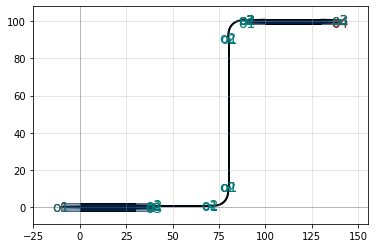

Textarea(value='\nname: sample_custom_cells\ninstances:\n    mmit:\n      component: mmi2x2_faba\n    mmib:\n …

Output()

In [18]:
mmi1x2_faba = gf.partial(gf.components.mmi1x2, length_mmi=30)
mmi2x2_faba = gf.partial(gf.components.mmi2x2, length_mmi=30)
gf.get_active_pdk().register_cells(mmi1x2_faba=mmi1x2_faba, mmi2x2_faba=mmi2x2_faba)

x.value = """
name: sample_custom_cells
instances:
    mmit:
      component: mmi2x2_faba
    mmib:
      component: mmi1x2_faba
      settings:
        width_mmi: 4.5
placements:
    mmit:
        x: 100
        y: 100
routes:
    route1:
        links:
            mmib,o2: mmit,o2
            
ports:
    o1: mmib,o1
    o2: mmit,o2
    o3: mmit,o3
    o4: mmit,o4
"""

display(x, out)

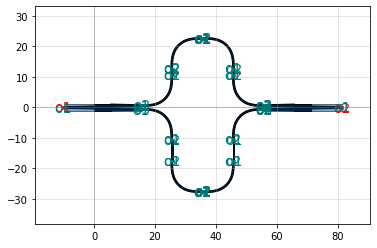

mzi: uid 165, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [19]:
c = gf.components.mzi()
c

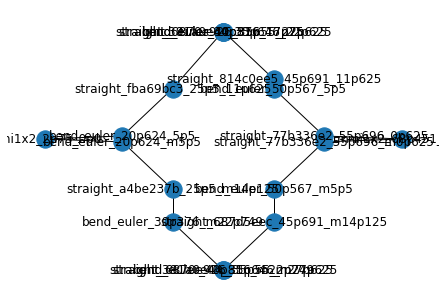

In [20]:
c.plot_netlist()

In [21]:
n = c.get_netlist()

In [22]:
print(c.get_netlist_dict().keys())

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])


## variables


You can define a global variables `settings` in your YAML file, and use the variable in the other YAML settings by using `${settings.length_mmi}`

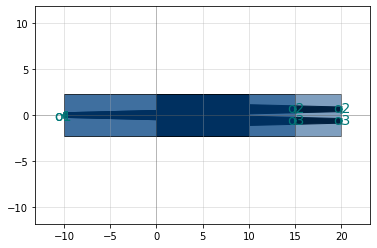

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1021: UserWarning: Component 'Unnamed_d74be02d' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\nsettings:\n    length_mmi: 10\n\ninstances:\n    mmi_long:\n      component: mmi1x2\n      s…

Output()

In [23]:
x.value = """
settings:
    length_mmi: 10

instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: ${settings.length_mmi}
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
"""

display(x, out)

## get_netlist (Component -> YAML)

Any component exports its netlist `get_netlist` and returns an `OmegaConf` dict that can be easily converted into JSON and YAML.

While `component_from_yaml` converts YAML -> Component

`get_netlist` converts Component -> YAML

In [24]:
import io
from omegaconf import OmegaConf
import gdsfactory as gf

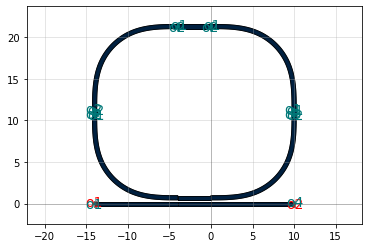

ring_single: uid 181, ports ['o2', 'o1'], aliases [], 0 polygons, 6 references

In [25]:
c = gf.components.ring_single()
c

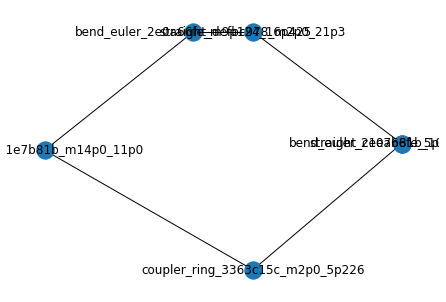

In [26]:
c.plot_netlist()

In [27]:
netlist = c.get_netlist()

In [28]:
n = netlist

In [29]:
c.write_netlist("ring.yml")

In [30]:
n = OmegaConf.load("ring.yml")

In [31]:
i = list(n["instances"].keys())
i

['bend_euler_2e0a66fe_5p124_16p425',
 'bend_euler_2e0a66fe_m9p124_16p425',
 'coupler_ring_3363c15c_m2p0_5p226',
 'straight_c1e7b81b_10p0_11p0',
 'straight_c1e7b81b_m14p0_11p0',
 'straight_defbc978_m2p0_21p3']

In [32]:
instance_name0 = i[0]

In [33]:
n["instances"][instance_name0]["settings"]

{'radius': 10}

```python
import gdsfactory as gf
from omegaconf import OmegaConf
import pathlib

c1 = gf.read.from_yaml('ring.yml')
c1
```

```python
n = c1.get_netlist(full_settings=True)
connections = n['connections']
len(connections)
```

## Plot netlist

You can plot the netlist of components.

Every gdsfactory component can either be defined by its netlist or using layout friendly functions such as component sequence to define it and then `get_netlist()` method.

Connections are determined by extracting all the ports of a component, and asuming that ports with the same (x, y) are connected.

 When you do `get_netlist()` for a component it will only show connections for the instances that belong to that component (it trims the netlist). So despite having  a lot of connections, it will show only the meaningful connections for that component. For example, a ring has a ring_coupler. but if you want to digg deeper, the connections that made that ring coupler are still available.

In [34]:
import gdsfactory as gf

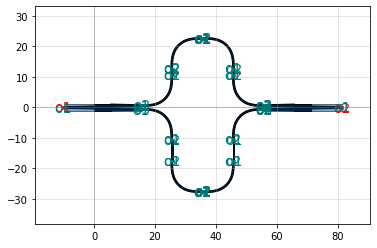

mzi: uid 165, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [35]:
c = gf.components.mzi()
c

In [36]:
c = gf.components.mzi()
n = c.get_netlist()
print(c.get_netlist_dict().keys())

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])


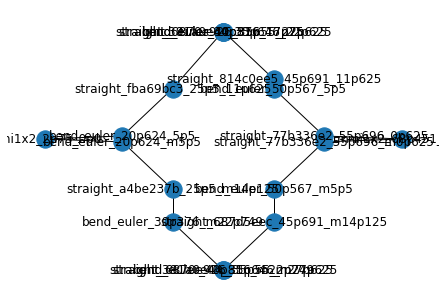

In [37]:
c.plot_netlist()

In [38]:
n.keys()

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])

mmi_with_bend_circular


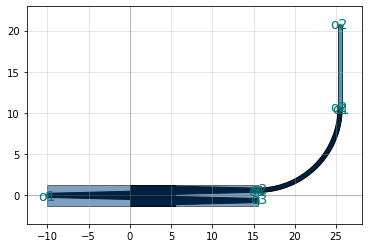

mmi_with_bend_circular: uid 192, ports [], aliases [], 0 polygons, 3 references

In [39]:
import gdsfactory as gf

yaml = """
name: mmi_with_bend
instances:

    mmi1x2_12_0:
        component: mmi1x2

    bend_circular_R10p00_32_4:
      component: bend_circular
    
    straight_L1p00_35_11:
        component: straight
        settings:
            length: 10
            layer: [2, 0]

connections:
    bend_circular_R10p00_32_4,o1: mmi1x2_12_0,o2
    straight_L1p00_35_11,o1: bend_circular_R10p00_32_4,o2
"""

c = gf.read.from_yaml(yaml)
c.name = "mmi_with_bend_circular"
print(c.name)
c

In [40]:
n = c.get_netlist()

In [41]:
print(c.get_netlist_yaml())

connections:
  bend_circular_R10p00_32_4,o1: mmi1x2_12_0,o2
  bend_circular_R10p00_32_4,o2: straight_L1p00_35_11,o1
instances:
  bend_circular_R10p00_32_4:
    component: bend_circular
    info:
      length: 15.708
      dy: 10
      radius: 10
    settings: {}
  mmi1x2_12_0:
    component: mmi1x2
    settings: {}
  straight_L1p00_35_11:
    component: straight
    info:
      length: 10
      width: 0.5
    settings:
      layer:
      - 2
      - 0
placements:
  bend_circular_R10p00_32_4:
    x: 15.5
    'y': 0.625
    rotation: 0
    mirror: false
  mmi1x2_12_0:
    x: 0.0
    'y': 0.0
    rotation: 0
    mirror: false
  straight_L1p00_35_11:
    x: 25.5
    'y': 10.625
    rotation: 90
    mirror: false
ports: {}
name: mmi_with_bend_circular



In [42]:
n["connections"]

{'bend_circular_R10p00_32_4,o1': 'mmi1x2_12_0,o2', 'bend_circular_R10p00_32_4,o2': 'straight_L1p00_35_11,o1'}

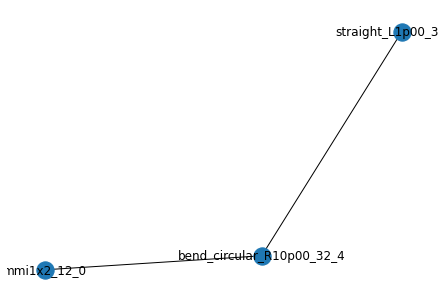

In [43]:
c.plot_netlist()

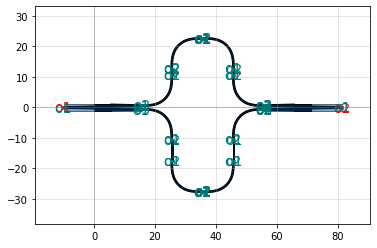

mzi: uid 165, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [44]:
c = gf.components.mzi()
c

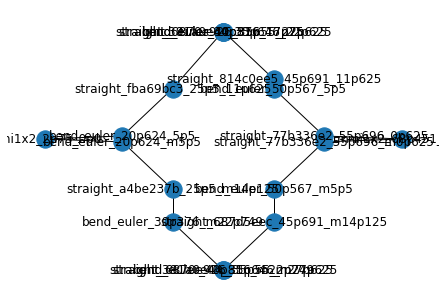

In [45]:
c.plot_netlist()

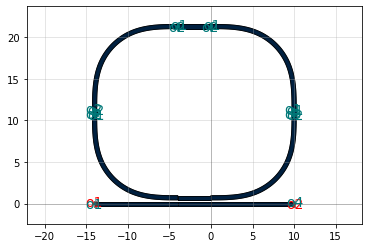

ring_single: uid 181, ports ['o2', 'o1'], aliases [], 0 polygons, 6 references

In [46]:
c = gf.components.ring_single()
c

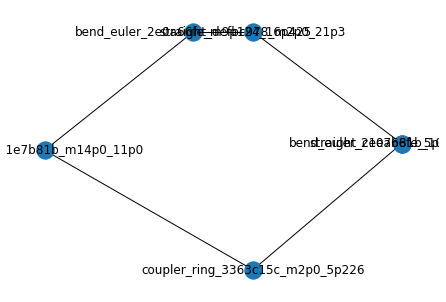

In [47]:
c.plot_netlist()

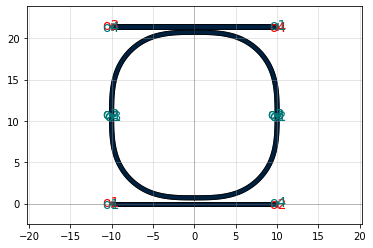

ring_double: uid 201, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 4 references

In [48]:
c = gf.components.ring_double()
c

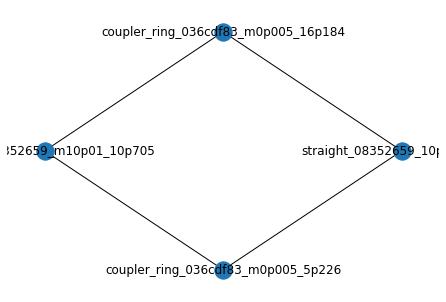

In [49]:
c.plot_netlist()

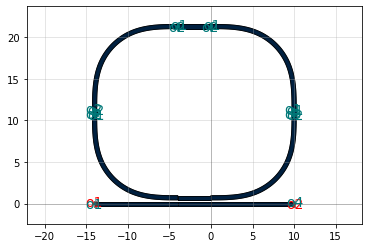

ring_single: uid 181, ports ['o2', 'o1'], aliases [], 0 polygons, 6 references

In [50]:
import gdsfactory as gf

c = gf.components.ring_single()
c

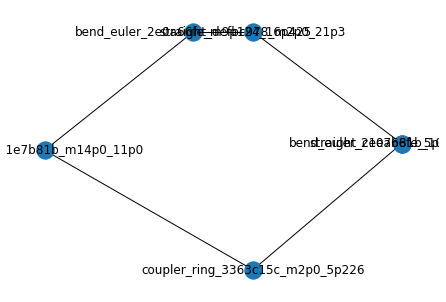

In [51]:
c.plot_netlist()

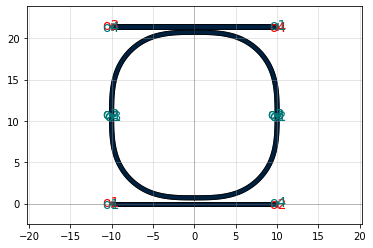

ring_double: uid 201, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 4 references

In [52]:
c = gf.components.ring_double()
c

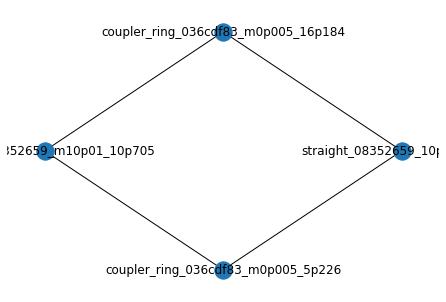

In [53]:
c.plot_netlist()

In [54]:
print(c.get_netlist_yaml())

connections:
  coupler_ring_036cdf83_m0p005_16p184,o2: straight_08352659_10p0_10p705,o2
  coupler_ring_036cdf83_m0p005_16p184,o3: straight_08352659_m10p01_10p705,o2
  coupler_ring_036cdf83_m0p005_5p226,o2: straight_08352659_m10p01_10p705,o1
  coupler_ring_036cdf83_m0p005_5p226,o3: straight_08352659_10p0_10p705,o1
instances:
  coupler_ring_036cdf83_m0p005_16p184:
    component: coupler_ring
    settings:
      cross_section:
        function: cross_section
        settings:
          add_pins:
            function: add_pins_siepic
            settings:
              pin_length: 0.002
          add_bbox:
            function: add_bbox_siepic
          cladding_layers:
          - DEVREC
          cladding_offsets:
          - 0
      length_x: 0.01
      radius: 10
  coupler_ring_036cdf83_m0p005_5p226:
    component: coupler_ring
    settings:
      cross_section:
        function: cross_section
        settings:
          add_pins:
            function: add_pins_siepic
            setti

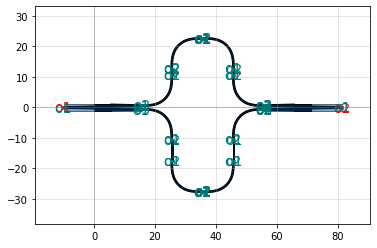

mzi: uid 165, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [55]:
c = gf.components.mzi()
c

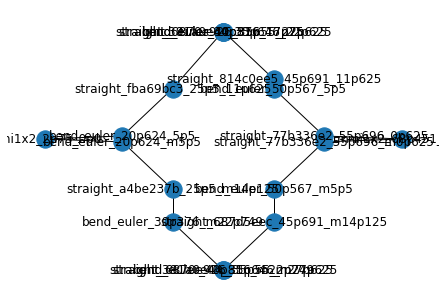

In [56]:
c.plot_netlist()

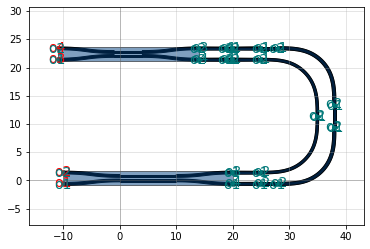

mzit: uid 202, ports ['o4', 'o3', 'o2', 'o1'], aliases [], 0 polygons, 17 references

In [57]:
c = gf.components.mzit()
c

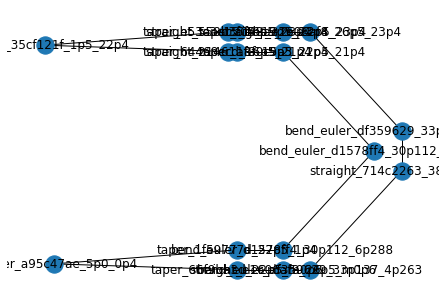

In [58]:
c.plot_netlist()

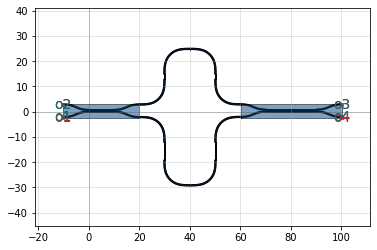

mzi_lattice: uid 235, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 1 references

In [59]:
c = gf.components.mzi_lattice()
c

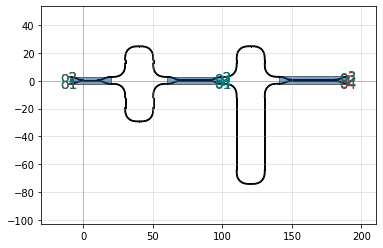

mzi_lattice_3b4b99d8: uid 253, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 2 references

In [60]:
import gdsfactory as gf

coupler_lengths = [10, 20, 30]
coupler_gaps = [0.1, 0.2, 0.3]
delta_lengths = [10, 100]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c

In [61]:
print(c.get_netlist_yaml())

connections:
  mzi_ba3141d0_145p302_m24p65,o1: mzi_efb90626_45p1_m2p2,o4
  mzi_ba3141d0_145p302_m24p65,o2: mzi_efb90626_45p1_m2p2,o3
instances:
  mzi_ba3141d0_145p302_m24p65:
    component: mzi
    settings:
      combiner:
        name: coupler_41a4681c
        version: 0.0.1
        settings:
          name: coupler_41a4681c
          module: gdsfactory.components.coupler
          function_name: coupler
          info:
            length: 10.305
            min_bend_radius: 9.568
          info_version: 2
          full:
            gap: 0.3
            length: 30
            coupler_symmetric:
              function: coupler_symmetric
            coupler_straight:
              function: coupler_straight
            dy: 5
            dx: 10
            cross_section: strip
          changed:
            gap: 0.3
            length: 30
          default:
            gap: 0.236
            length: 20
            coupler_symmetric:
              function: coupler_symmetric
           

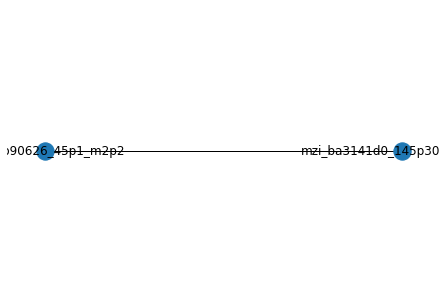

In [62]:
c.plot_netlist()

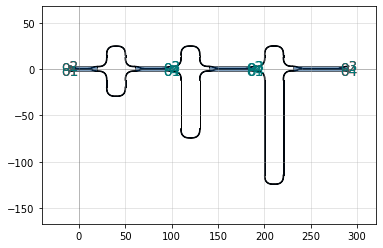

mzi_lattice_d52c1fad: uid 272, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 0 polygons, 3 references

In [63]:
coupler_lengths = [10, 20, 30, 40]
coupler_gaps = [0.1, 0.2, 0.4, 0.5]
delta_lengths = [10, 100, 200]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c

In [64]:
n = c.get_netlist()

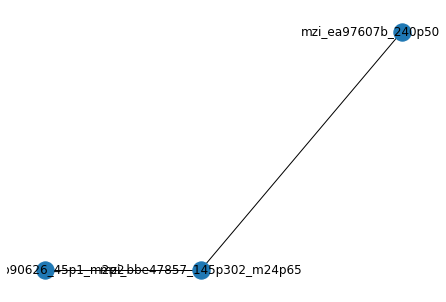

In [65]:
c.plot_netlist()